In [376]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
import time

### Récuperation de la liste des plateformes de jeu 

In [106]:
r = requests.get('https://www.dureedevie.fr')
request_text = r.text
soup = BeautifulSoup(request_text)
plateformes = []
for a in soup.find_all("a", {"class": "text-lg text-gray-900 font-medium hover:text-gray-600"}) :
    plateformes.append([a.text, a.get('href')])


In [107]:
plateformes

[['Nos conseils jeux pour Noël', '/piles/nos-conseils-jeux-pour-noel'],
 ['Game Awards 2021', '/piles/game-awards-2021'],
 ['XBOX Game Pass', '/piles/xbox-game-pass'],
 ['Apple Arcade', '/piles/apple-arcade'],
 ['Attentes 2021', '/piles/attentes-2021'],
 ['Attentes 2022', '/piles/attentes-2022'],
 ['Bandes originales', '/piles/bandes-originales'],
 ['Gamekult Awards 2020', '/piles/gamekult-awards-2020'],
 ['Pégases 2021', '/piles/pegases-2021'],
 ['Game Awards 2020', '/piles/game-awards-2020'],
 ['Pégases 2020', '/piles/pegases-2020'],
 ["Pixel d'Or 2019", '/piles/pixel-d-or-2019'],
 ['Game Awards 2019', '/piles/game-awards-2019'],
 ['Android', '/plateformes/android'],
 ['Game Boy Advance', '/plateformes/game-boy-advance'],
 ['Game Boy Color', '/plateformes/game-boy-color'],
 ['Google Stadia', '/plateformes/google-stadia'],
 ['iPhone OS (iOS)', '/plateformes/iphone-os-ios'],
 ['Linux', '/plateformes/linux'],
 ['Mac', '/plateformes/mac'],
 ['Megadrive', '/plateformes/megadrive'],
 ['NES

### Suppression des classements

In [108]:
for i in range(0,13,1):
    plateformes.pop(0)

In [109]:
plateformes

[['Android', '/plateformes/android'],
 ['Game Boy Advance', '/plateformes/game-boy-advance'],
 ['Game Boy Color', '/plateformes/game-boy-color'],
 ['Google Stadia', '/plateformes/google-stadia'],
 ['iPhone OS (iOS)', '/plateformes/iphone-os-ios'],
 ['Linux', '/plateformes/linux'],
 ['Mac', '/plateformes/mac'],
 ['Megadrive', '/plateformes/megadrive'],
 ['NES', '/plateformes/nes'],
 ['Nintendo 3DS', '/plateformes/nintendo-3ds'],
 ['Nintendo 64', '/plateformes/nintendo-64'],
 ['Nintendo DS', '/plateformes/nintendo-ds'],
 ['Nintendo Gamecube', '/plateformes/nintendo-gamecube'],
 ['Nintendo Switch', '/plateformes/nintendo-switch'],
 ['Oculus Quest', '/plateformes/oculus-quest'],
 ['PC', '/plateformes/pc'],
 ['PC VR', '/plateformes/pc-vr'],
 ['PlayStation', '/plateformes/playstation'],
 ['PlayStation 2', '/plateformes/playstation-2'],
 ['PlayStation 3', '/plateformes/playstation-3'],
 ['PlayStation 4', '/plateformes/playstation-4'],
 ['PlayStation 5', '/plateformes/playstation-5'],
 ['PlayS

### récuperation de tous les jeux sur toutes les plateformes

In [238]:
%%time
listeJeux = []
#recuperation de la liste des jeux pour toutes les plateformes
for plateforme in plateformes :
    time.sleep(1)
    r = requests.get('https://www.dureedevie.fr{}'.format(plateforme[1]))
    request_text = r.text
    soup = BeautifulSoup(request_text)
    #pour chaque jeu
    for a in soup.find_all("a", {"class": "underline"}) :
        r = requests.get('https://www.dureedevie.fr{}'.format(a.get('href')))
        request_text = r.text
        soup = BeautifulSoup(request_text)
        data = []
        for dd in soup.find_all("dd"):
            data.append(dd.text)
        while len(data) <9 :
            data.insert(0,'N/A')
        if len(data) == 9 : 
            listeJeux.append([a.text ,plateforme[0], data])
        #print(listeJeux)

Wall time: 3min 12s


In [239]:
len(listeJeux)

2184

In [250]:
listeJeux[0][2]

['N/A',
 'N/A',
 'N/A',
 'N/A',
 'Course/Conduite',
 'Nintendo Switch, Android, iPhone OS (iOS)',
 'Pixel Perfect Dude, Lionsharp Studios',
 'Pixel Perfect Dude, PM Studios',
 '20/03/2019']

In [333]:
d = { 'titre': [listeJeux[i][0] for i in range(len(listeJeux))],
    'Temps de jeu moyen' : [listeJeux[i][2][0] for i in range(len(listeJeux))],
     'Histoire  Trame principale' : [listeJeux[i][2][1] for i in range(len(listeJeux))],
     'Histoire + Quêtes secondaires' : [listeJeux[i][2][2] for i in range(len(listeJeux))],
     'Complétionniste (100%)' : [listeJeux[i][2][3] for i in range(len(listeJeux))],
     'Genres' : [listeJeux[i][2][4] for i in range(len(listeJeux))],
     'Plateformes' : [listeJeux[i][1] for i in range(len(listeJeux))],
     'Développeur' : [listeJeux[i][2][6] for i in range(len(listeJeux))],
     'Editeur' : [listeJeux[i][2][7] for i in range(len(listeJeux))],
     'Date de sortie' : [listeJeux[i][2][8] for i in range(len(listeJeux))]
    }
df = pd.DataFrame(data=d)


## Clean du csv

In [361]:
df.describe()

,Temps de jeu moyen,Histoire Trame principale,Histoire + Quêtes secondaires,Complétionniste (100%)
count,1392.000000,1593.000000,1798.000000,1830.000000
mean,20.496193,16.056403,28.788459,42.513962
std,23.674274,55.275746,74.157956,75.905292
min,1.300000,0.150000,0.150000,0.150000
25%,6.000000,5.000000,6.000000,8.300000
50%,12.000000,9.000000,12.300000,20.000000
75%,25.300000,18.000000,27.300000,44.000000
max,135.000000,1246.000000,1250.000000,1243.000000


In [336]:
df.dtypes

titre                             object
Temps de jeu moyen               float64
Histoire  Trame principale       float64
Histoire + Quêtes secondaires    float64
Complétionniste (100%)           float64
Genres                            object
Plateformes                       object
Développeur                       object
Editeur                           object
Date de sortie                    object
dtype: object

### Converstion de la date en Datetime

In [349]:
df['Date de sortie'] = pd.to_datetime(df['Date de sortie'], format='%d/%m/%Y',errors='coerce')

### converstion des temps de jeu en int 

In [334]:
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    df[colonne] = pd.to_numeric(df[colonne].str.replace('h', '.', regex=True),errors='coerce')

### Génération du csv

In [ ]:
df.to_csv(r'dataframe.csv',sep=';')

## Analytics

### Nombres de jeux par plateformes

In [268]:
df['Plateformes'].value_counts()

PC                   546
PlayStation 4        362
Nintendo Switch      322
Xbox One             302
PlayStation 5        128
Xbox Series X/S      123
iPhone OS (iOS)       94
Mac                   66
Android               58
Google Stadia         41
PlayStation 3         24
PlayStation Vita      20
Xbox 360              18
Linux                 16
Oculus Quest          13
PlayStation VR        11
Wii U                  7
PC VR                  7
Nintendo 3DS           7
Wii                    4
Xbox                   4
PlayStation 2          3
Nintendo DS            2
Nintendo Gamecube      2
PlayStation            1
Megadrive              1
Nintendo 64            1
Saturn                 1
Name: Plateformes, dtype: int64

### Nombre de jeux par années et par ordre asc 

In [390]:
df['Date de sortie'].dt.year.value_counts().sort_index()

1996.0      3
1998.0      7
2002.0      1
2003.0     10
2004.0      2
2006.0      5
2007.0      5
2008.0     14
2009.0     20
2010.0     22
2011.0     22
2012.0     18
2013.0     45
2014.0     32
2015.0     49
2016.0     90
2017.0     83
2018.0    144
2019.0    267
2020.0    340
2021.0    995
Name: Date de sortie, dtype: int64

### min des temps 

In [344]:
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    print('min de {} : {} '.format(colonne,df[colonne].min()))

min de Temps de jeu moyen : 1.3 
min de Histoire  Trame principale : 0.15 
min de Histoire + Quêtes secondaires : 0.15 
min de Complétionniste (100%) : 0.15 


### Moyennes des temps 

In [342]:
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    print('moyenne de {} : {} '.format(colonne,df[colonne].mean()))


moyenne de Temps de jeu moyen : 20.496192528735634 
moyenne de Histoire  Trame principale : 16.056403013182674 
moyenne de Histoire + Quêtes secondaires : 28.78845939933259 
moyenne de Complétionniste (100%) : 42.51396174863388 


### Max des temps 

In [477]:
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    print('max de {} : {} '.format(colonne,df[colonne].max()))


max de Temps de jeu moyen : 135.0 
max de Histoire  Trame principale : 1246.0 
max de Histoire + Quêtes secondaires : 1250.0 
max de Complétionniste (100%) : 1243.0 


## graphiques

### Nombre de jeux par annnée

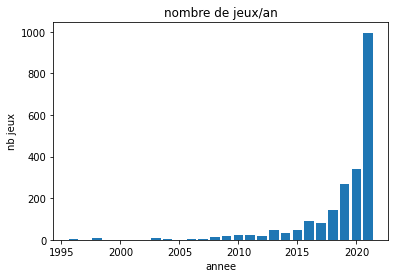

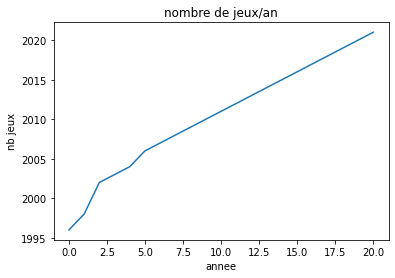

In [483]:
nbJeux = df['Date de sortie'].dt.year.value_counts().sort_index().tolist()
annee = df['Date de sortie'].dt.year.value_counts().sort_index().keys().tolist()


plt.bar(annee, nbJeux )
plt.xlabel('annee')
plt.ylabel('nb jeux')
plt.title('nombre de jeux/an')
plt.show()
plt.xlabel('annee')
plt.ylabel('nb jeux')
plt.title('nombre de jeux/an')
plt.plot(annee,  )
plt.show()

### Min des temps/ par plateforme

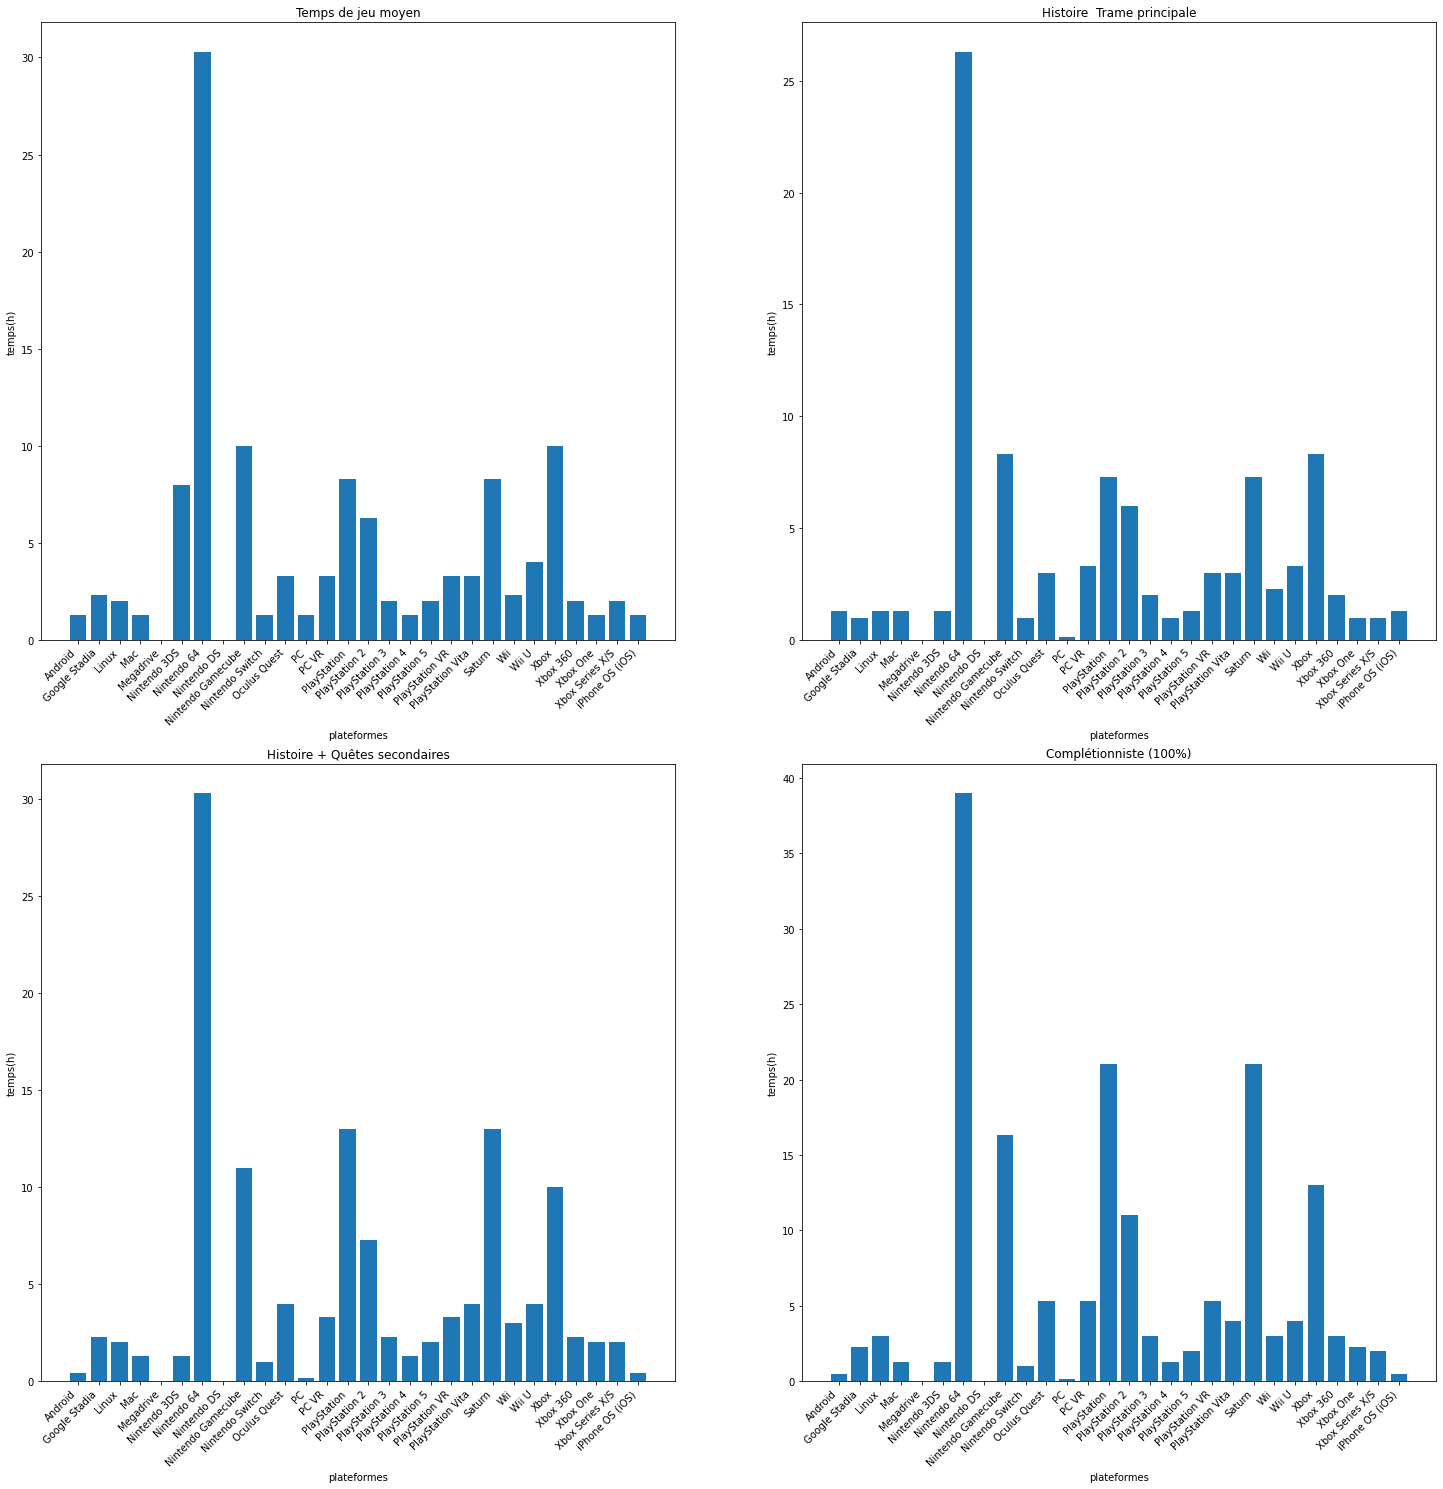

In [473]:
data = 220
plt.figure(figsize=(25,25))
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    data+=1
    plt.subplot(data)
    plt.xlabel('plateformes')
    plt.ylabel('temps(h)')
    plt.title(colonne)
    plt.xticks(rotation=45, ha='right')   
    plt.bar(df[colonne].groupby(df['Plateformes']).min().keys().tolist(),df[colonne].groupby(df['Plateformes']).min().tolist() )

### moyennes des temps/ par plateforme

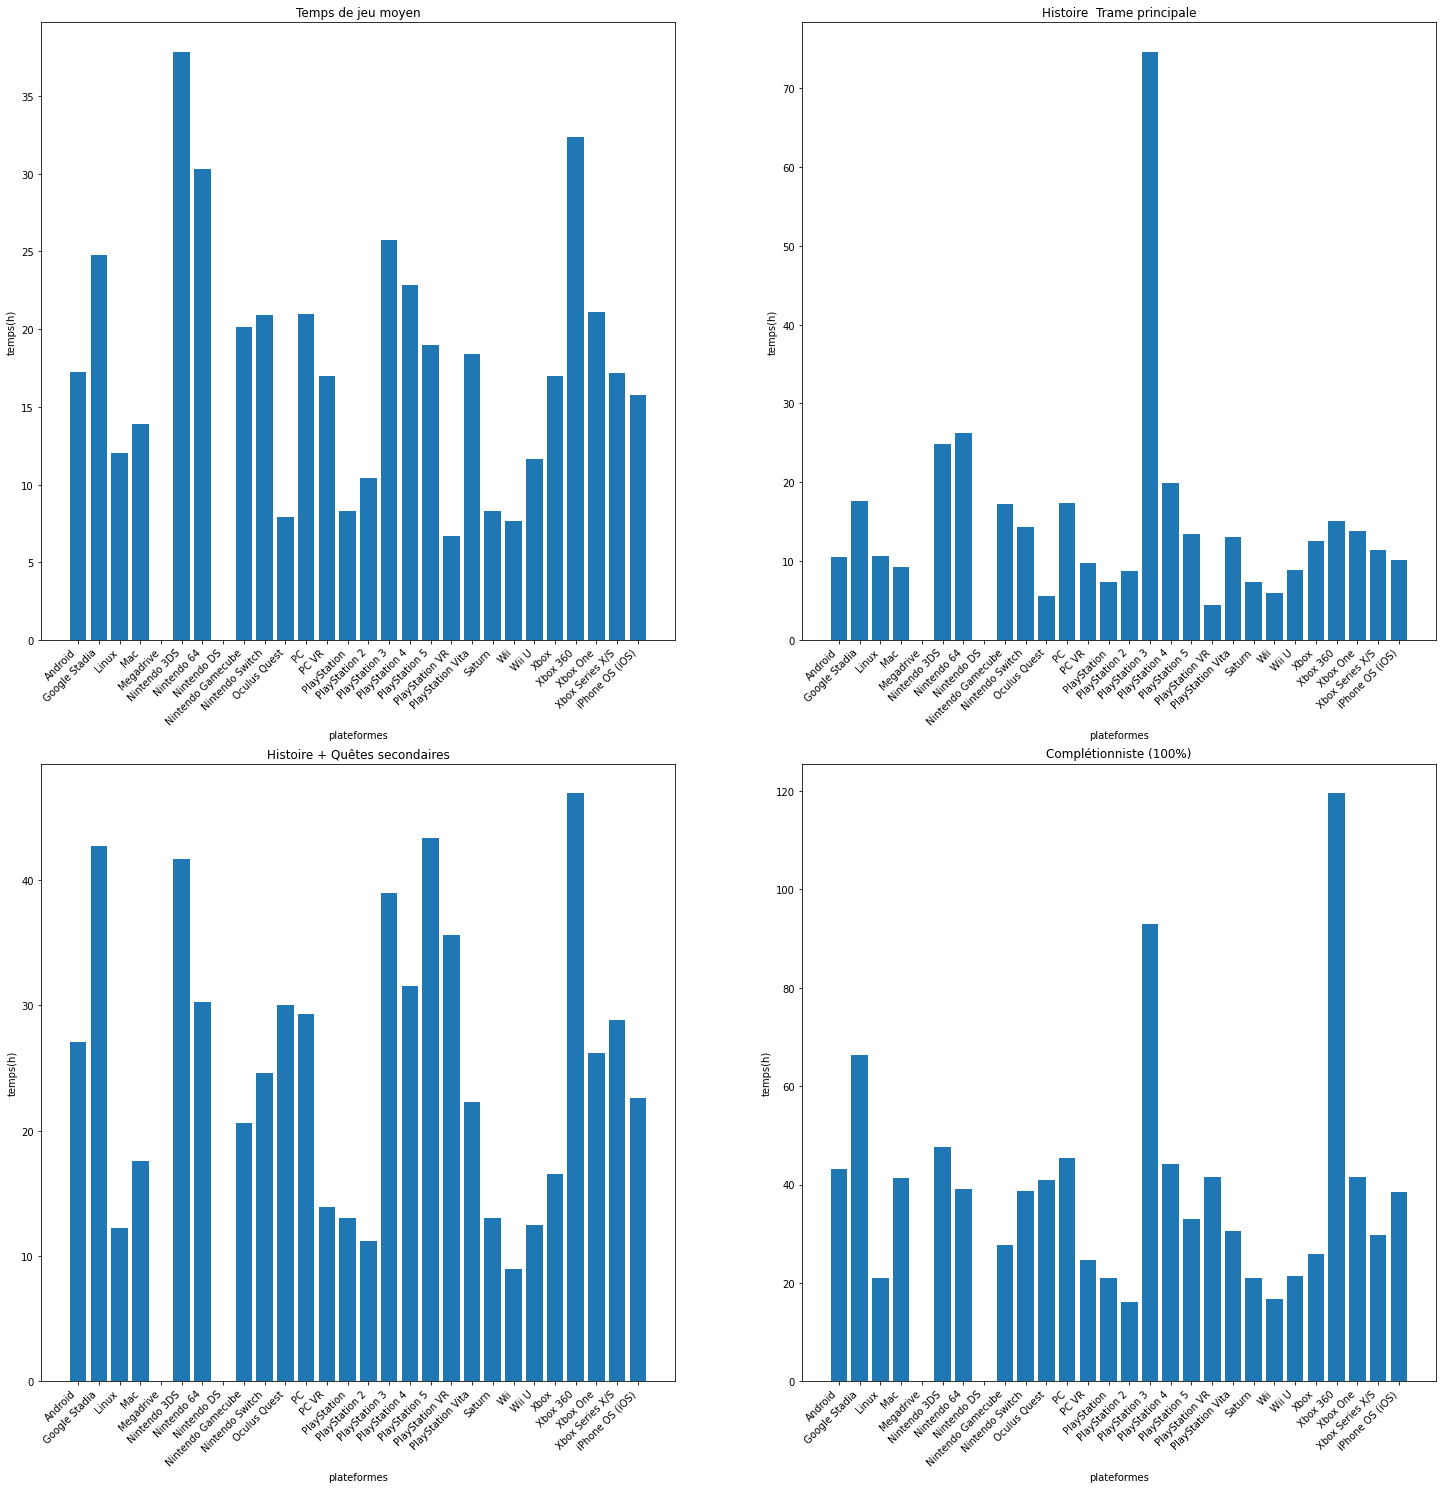

In [474]:
data = 220
plt.figure(figsize=(25,25))
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    data+=1
    plt.subplot(data)
    plt.xlabel('plateformes')
    plt.ylabel('temps(h)')
    plt.title(colonne)
    plt.xticks(rotation=45, ha='right')   
    plt.bar(df[colonne].groupby(df['Plateformes']).mean().keys().tolist(),df[colonne].groupby(df['Plateformes']).mean().tolist() )

### Max des temps/ par plateforme

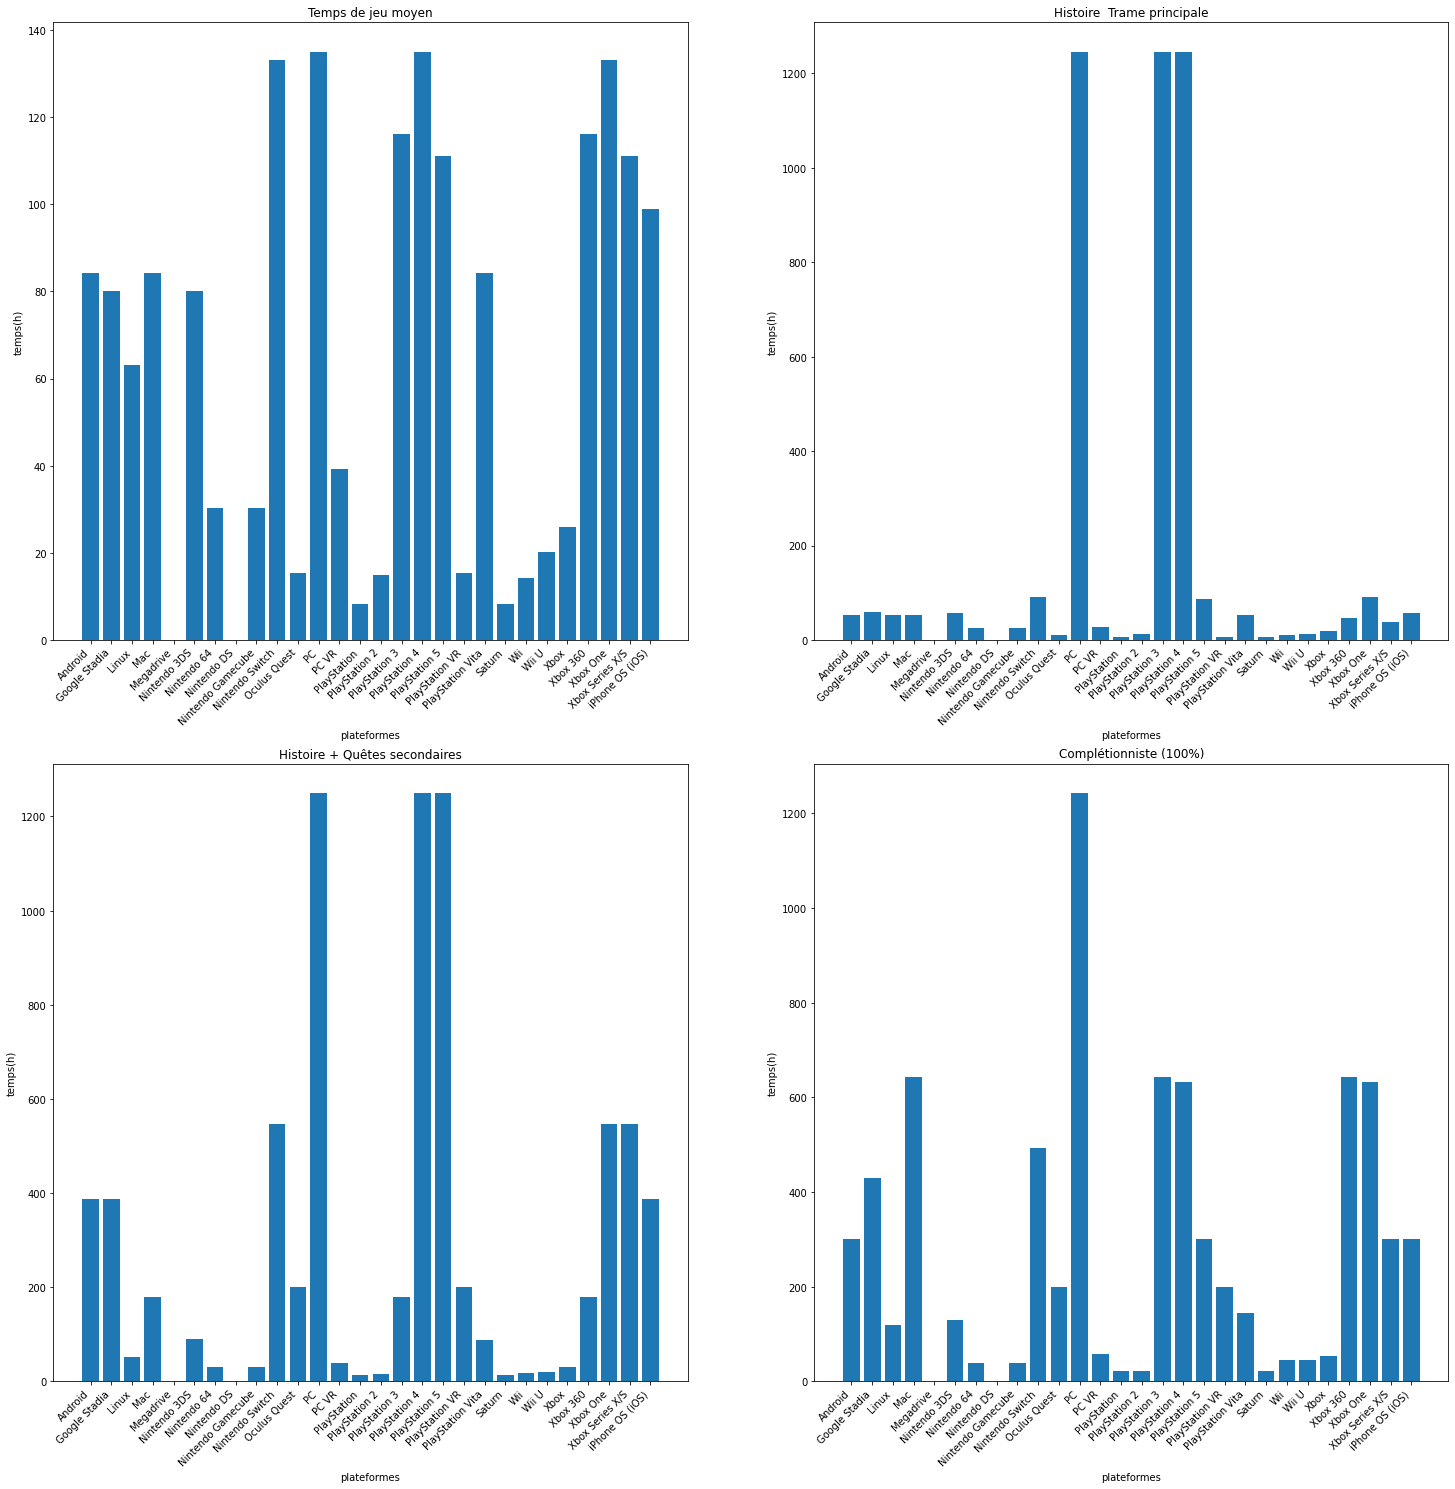

In [475]:
data = 220
plt.figure(figsize=(25,25))
for colonne in ['Temps de jeu moyen','Histoire  Trame principale','Histoire + Quêtes secondaires','Complétionniste (100%)'] :
    data+=1
    plt.subplot(data)
    plt.xlabel('plateformes')
    plt.ylabel('temps(h)')
    plt.title(colonne)
    plt.xticks(rotation=45, ha='right')   
    plt.bar(df[colonne].groupby(df['Plateformes']).max().keys().tolist(),df[colonne].groupby(df['Plateformes']).max().tolist() )